## 1. juntar todas as imagens em uma única


In [3]:
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

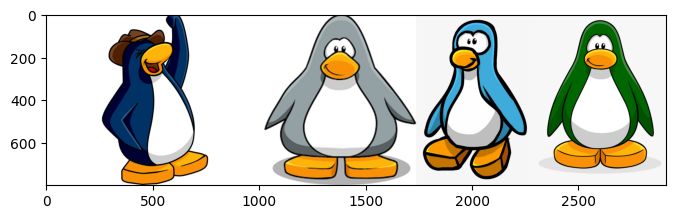

In [4]:
p1 = np.array(Image.open('P1.png').convert('RGB'))
p2 = np.array(Image.open('P2.png').convert('RGB'))
p3 = np.array(Image.open('P3.jpg').convert('RGB'))
p4 = np.array(Image.open('P4.png').convert('RGB'))

height_px = 800

#padronizar altura
def resize(img, height):
    h, w = img.shape[:2]
    new_width = int(w * (height / h))
    return np.array(Image.fromarray(img).resize((new_width, height)))

p1_resized = resize(p1, height_px)
p2_resized = resize(p2, height_px)
p3_resized = resize(p3, height_px)
p4_resized = resize(p4, height_px)

#concatenar lado a lado
img = np.concatenate([p1_resized, p2_resized, p3_resized, p4_resized], axis=1)

plt.figure(figsize=(8, 8))
plt.imshow(img)

## 2. trocar as cores (mudar a cor dos pinguins para rosa)

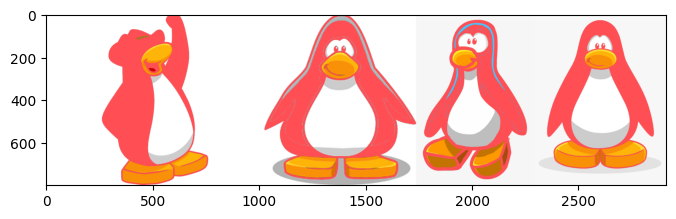

In [ ]:
def changeColor(img):
    rosa=[255, 79, 85]
    imgMod = img.copy()

    #mascara para detectar os pinguins
    mascara = np.all((img >= np.array([0, 0, 0])) & (img <= np.array([150, 180, 218])), axis=-1) #entre preto e o pinguim mais claro(tom de azul)

    imgMod[mascara] = rosa

    return imgMod

imgRosa = changeColor(img)

plt.figure(figsize=(8, 8))
plt.imshow(imgRosa)

## 3. aplicar o espelhamento

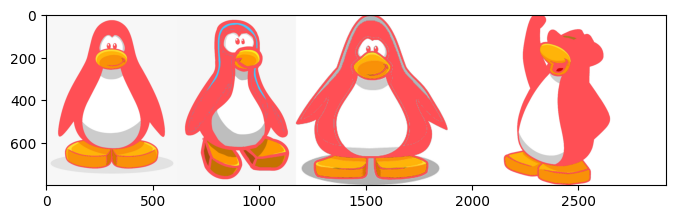

In [ ]:
def reflect(img):
  return img[:, ::-1] #passo negativo para todos os elementos da linha(inverte em y)

imgRefl = reflect(imgRosa)

plt.figure(figsize=(8, 8))
plt.imshow(imgRefl)

## 4. recortar seu pinguim favorito (descarte os outros, deixando apenas um na imagem)

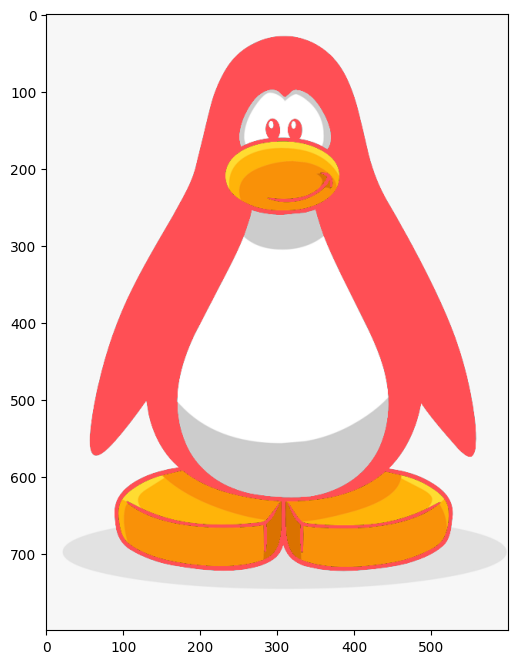

In [ ]:
def crop(image: np.ndarray):
  return image[:, 0:600]

imgFav = crop(imgRefl)

plt.figure(figsize=(8, 8))
plt.imshow(imgFav)

## 5. faça a analise do histograma em seu pinguim favorito e escolha um valor de threshold.  (Justifique a escolha do threshold)

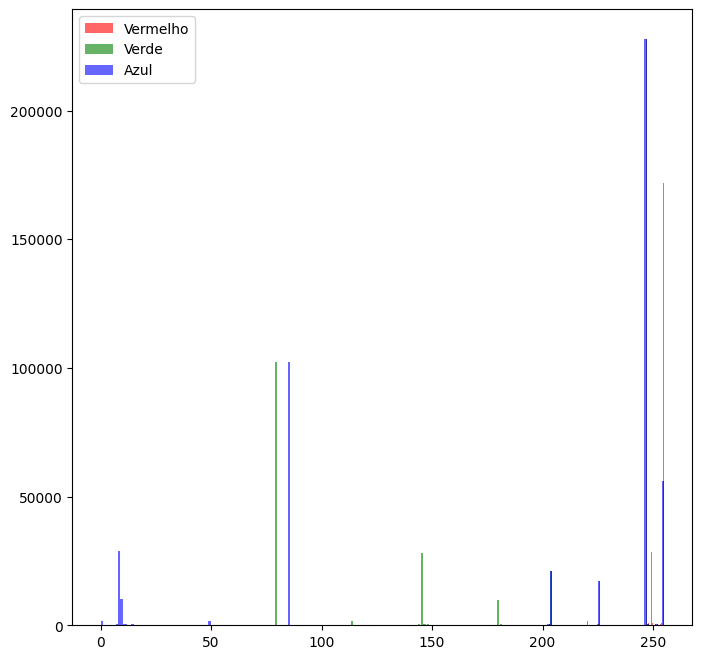

In [75]:
def rgbHistogram(img):
    r, g, b = img[:,:,0], img[:,:,1], img[:,:,2]
    
    plt.figure(figsize=(8, 8))
    
    #histogramas para cada canal
    plt.hist(r.ravel(), bins=256, color='red', alpha=0.6, label='Vermelho')
    plt.hist(g.ravel(), bins=256, color='green', alpha=0.6, label='Verde')
    plt.hist(b.ravel(), bins=256, color='blue', alpha=0.6, label='Azul')
    
    plt.legend()
    plt.show()

rgbHistogram(imgFav)

analisando os picos (~80 e ~250), chegamos a um threshold de 165

## 6. aplique uma conversão para que todos os pixeis abaixo dele sejam pintados de sua cor favorita

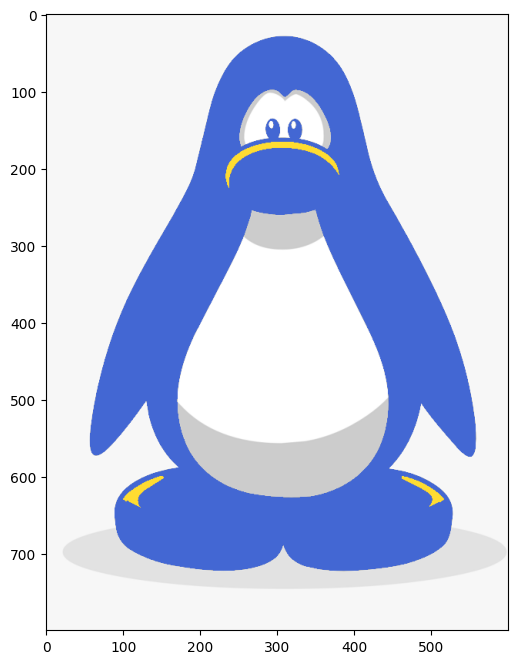

In [ ]:
def changeColor2(img):
    threshold=165
    azul=[67, 103, 211]
    imgGray = np.mean(img, axis=-1) #escala de cinza
    imgMod = img.copy()
    
    mascara = imgGray < threshold
    imgMod[mascara] = azul
    
    plt.figure(figsize=(8, 8))
    plt.imshow(imgMod)

changeColor2(imgFav)